In [30]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.cluster import KMeans

In [31]:
# Import data
file_path = 'myopia.csv'

In [32]:
myopia_df = pd.read_csv(file_path)

In [33]:
# Preview data
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


#Part 1: Prepare the Data

In [34]:
# List features
myopia_df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [35]:
myopia_df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [36]:
# Remove the Myopic column since we are running models without training, labels not needed
new_myopia_df= myopia_df.drop(['MYOPIC'], axis=1)
new_myopia_df.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [37]:
 # Find null values
for column in new_myopia_df.columns:
    print(f"Column {column} has {new_myopia_df[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [38]:
# Find duplicate entries
print(f"Duplicate entries: {new_myopia_df.duplicated().sum()}")

Duplicate entries: 0


In [39]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_myopia_df)

In [40]:
# Create a DataFrame with the transformed data
final_myopia_df = pd.DataFrame(scaled_data, columns=new_myopia_df.columns)

In [41]:
# Save the cleaned DataFrame as a new CSV file for further use
file = Path("new_myopia_data.csv")
final_myopia_df.to_csv(file, index=False)


#Part 2: Apply Dimensionality Reduction
PCA



In [42]:
# Applying PCA to preserve approximately 90% of the explained variance

# Initialize PCA model
pca = PCA(n_components=0.9)

# Get principal components 
myopia_pca = pca.fit_transform(scaled_data)
myopia_pca.shape

(618, 10)

In [43]:
 # Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [44]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2", "principal component 3", 
                              "principal component 4", "principal component 5", "principal component 6",
                              "principal component 7", "principal component 8","principal component 9",
                             "principal component 10",]
)
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [45]:
 # Initialize t-SNE model
tsne = TSNE(learning_rate=15)

In [46]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca)
# The dataset has 2 columns
tsne_features.shape

(618, 2)

In [47]:
# Prepare to plot the dataset

# The first column of transformed features
df_myopia_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_myopia_pca['y'] = tsne_features[:,1]

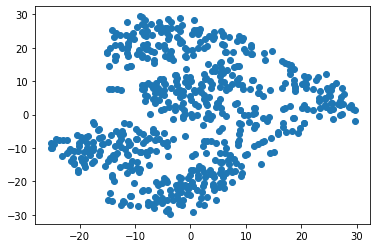

In [48]:
# Visualize the clusters
plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'])
plt.show()


Part 3: Perform a Cluster Analysis with K-means

In [49]:
# Create an elbow plot to identify the best number of clusters
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(final_myopia_df)
    inertia.append(km.inertia_)

# Create dataframe for plotting
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,8652.000000
1,2,7497.115123
2,3,6732.095466
3,4,6362.286058
4,5,6083.180361


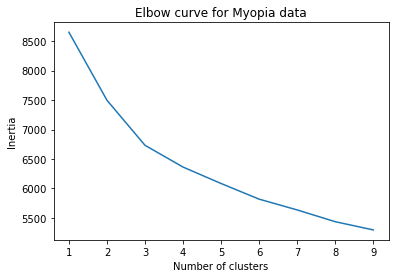

In [50]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,10))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia data')
plt.show()


In [51]:
# Initialize the K-Means model
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(df_myopia_pca)

# Predict clusters
predictions = model.predict(df_myopia_pca)

# Add the predicted class column for plotting
df_myopia_pca["class"] = model.labels_
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,3.600662,-1.202605,2
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-4.611792,25.788336,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1.991490,-23.282997,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,-17.545721,-2.251642,3
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,5.419523,15.298059,2


In [52]:
# Initialize the K-Means model
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(df_myopia_pca)

# Predict clusters
predictions = model.predict(df_myopia_pca)

# Add the predicted class column for plotting
df_myopia_pca["class"] = model.labels_
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,3.600662,-1.202605,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-4.611792,25.788336,4
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1.991490,-23.282997,3
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,-17.545721,-2.251642,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,5.419523,15.298059,0


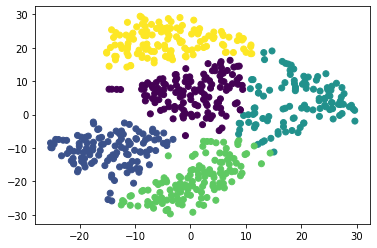

In [53]:
# Plot the clusters with colors according to class label
plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'], c=df_myopia_pca['class'])
plt.show()


##Part 4: Make a Recommendation
#It does appear that the data can be clustered. We could further analyze the data based on five distinct groups of patients.